In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    plt.show()

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")
    plt.show()

# Zad
Pobierz dane 
https://goo.gl/EgJVXZ

do <tt>\datasets\flowers</tt>

i umieść je w lokalizacji 

Każdy podkatalog katalogu flower_photos zawiera wszystkie zdjęcia danej klasy. 

Zróbmy listę klas:

In [3]:
import sys
import tarfile
from six.moves import urllib

FLOWERS_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
FLOWERS_PATH = os.path.join("datasets", "flowers")

flowers_root_path = os.path.join(FLOWERS_PATH, "flower_photos")
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))])
flower_classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

Zróbmy listę wszystkich ścieżek plików obrazów dla każdej klasy:

In [4]:
from collections import defaultdict

image_paths = defaultdict(list)

for flower_class in flower_classes:
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir):
        if filepath.endswith(".jpg"):
            image_paths[flower_class].append(os.path.join(image_dir, filepath))

Posortujmy ścieżki obrazów, aby mieć zawsze ta sama kolejnoć:

In [5]:
for paths in image_paths.values():
    paths.sort()

Rzućmy okiem na kilka pierwszych zdjęć z każdej klasy:

Class: daisy


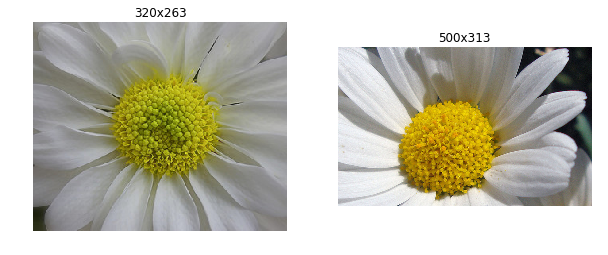

Class: dandelion


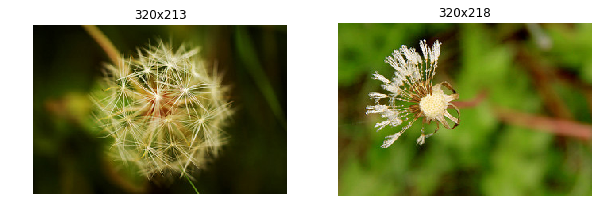

Class: roses


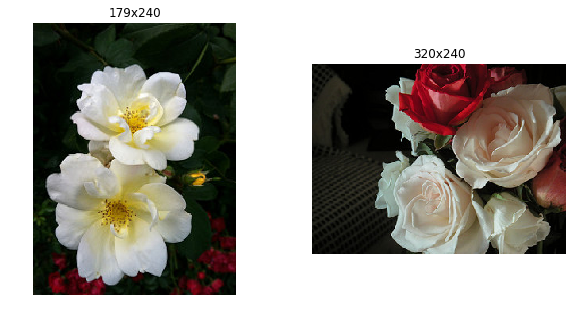

Class: sunflowers


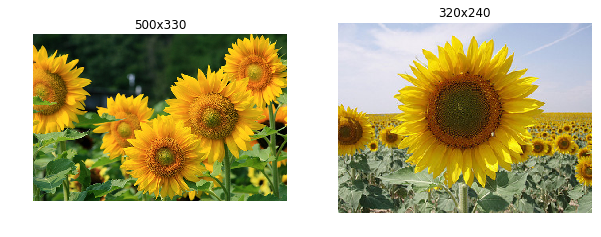

Class: tulips


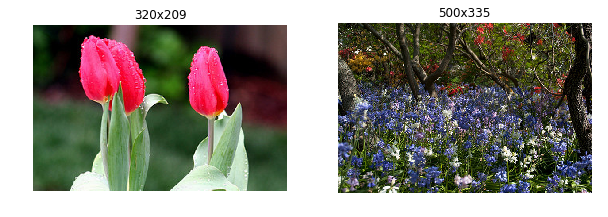

In [6]:
import matplotlib.image as mpimg

n_examples_per_class = 2

width = 299
height = 299
channels = 3

for flower_class in flower_classes:
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1)
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()

Zwróć uwagę, jak różnią się wymiary obrazu i jak trudne jest to zadanie w niektórych przypadkach (np. Drugi obraz tulipana).

# Zad. 

Napisz wstępne przetwarzania, który zmieni rozmiar obrazu do 299 × 299 z pewną losowością do zwiększenia ilości danych.

In [7]:
from scipy.misc import imresize

def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    """Zooms and crops the image randomly for data augmentation."""

    # First, let's find the largest bounding box with the target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
        
    # Now let's shrink this bounding box by a random factor (dividing the dimensions by a random number
    # between 1.0 and 1.0 + `max_zoom`.
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    
    # Next, we can select a random location on the image for this bounding box.
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    
    # Let's crop the image using the random bounding box we built.
    image = image[y0:y1, x0:x1]

    # Let's also flip the image horizontally with 50% probability:
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Now, let's resize the image to the target dimensions.
    image = imresize(image, (target_width, target_height))
    
    # Finally, let's ensure that the colors are represented as
    # 32-bit floats ranging from 0.0 to 1.0 (for now):
    return image.astype(np.float32) / 255

Mieliśmy taki obrazek

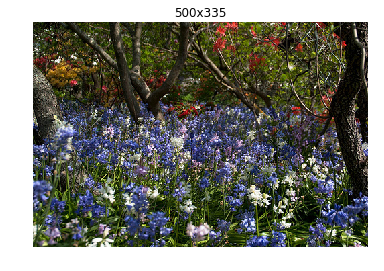

In [8]:
plt.figure(figsize=(6, 8))
plt.imshow(example_image)
plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.show()

Teraz mamy takie obrazki

C:\Users\admin\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\admin\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


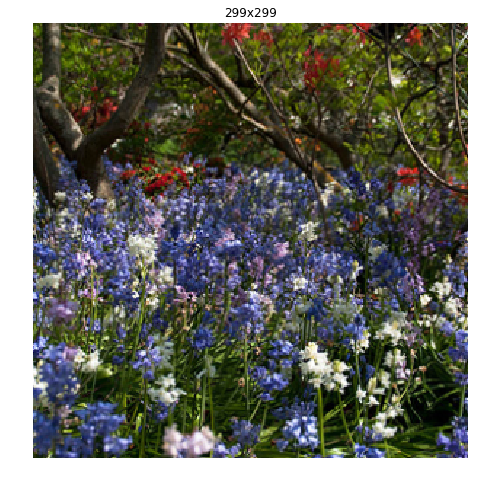

In [9]:
prepared_image = prepare_image(example_image)

plt.figure(figsize=(8, 8))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

Teraz spójrzmy na kilka losowych obrazów wygenerowanych z tego samego oryginalnego obrazu:

C:\Users\admin\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\admin\Anaconda3\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


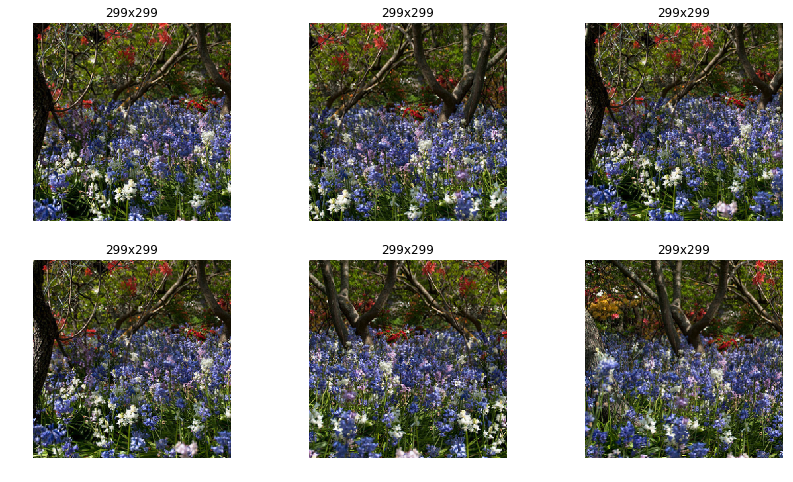

In [10]:
rows, cols = 2, 3

plt.figure(figsize=(14, 8))
for row in range(rows):
    for col in range(cols):
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()

# Zad 

Korzystając ze wstępnie nauczonego modelu Inception v3, zamroź wszystkie warstwy do warstwy wąskiego gardła (tj. Ostatniej warstwy przed warstwą wyjściową) i zastąp warstwę wyjściową odpowiednią liczbą wyników dla nowego zadania klasyfikacji 

  * zbiór danych kwiatów ma pięć wzajemnie wykluczających się klas, więc warstwa wyjściowa musi mieć pięć neuronów i użyć funkcji aktywacji softmax)

Zacznijmy od ponownego pobrania grafu v3. 

In [11]:
from tensorflow.contrib.slim.nets import inception
import tensorflow.contrib.slim as slim

tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)

inception_saver = tf.train.Saver()

Teraz musimy znaleźć punkt w grafie, do którego powinniśmy dołączyć nową warstwę wyjściową. Powinna to być warstwa tuż przed bieżącą warstwą wyjściową. 

Jednym ze sposobów na to jest zbadanie danych wchodzących do warstwy wyjściowej:

In [12]:
logits.op.inputs[0]

<tf.Tensor 'InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0' shape=(?, 1, 1, 1001) dtype=float32>

In [ ]:
logits.op.inputs[0].op.inputs[0]

In [ ]:
logits.op.inputs[0].op.inputs[0].op.inputs[0]

Aha! Oto jesteśmy, to jest wyjście z warstwy dropout layer.

Jest to ostatnia warstwa przed warstwą wyjściową w sieci Inception v3, więc jest to warstwa, na której musimy się oprzeć. 

Zauważ, że w rzeczywistości był prostszy sposób na znalezienie tej warstwy: funkcja inception_v3 () zwraca komunikat o punktach końcowych:

In [ ]:
end_points

Jak widać, punkt końcowy "PreLogits" jest dokładnie tym, czego potrzebujemy:

In [ ]:
end_points["PreLogits"]

Możemy usunąć 2. i 3. wymiar za pomocą funkcji 
```python
tf.squeeze()
```

In [ ]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2])

Następnie możemy dodać końcową warstwę fully connected na wierzchu tej warstwy:

In [ ]:
n_outputs = len(flower_classes)

with tf.name_scope("new_output_layer"):
    flower_logits = tf.layers.dense(prelogits, n_outputs, name="flower_logits")
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")

Na koniec musimy dodać zwykły bias i :

  * placeholder dla targetów (y),
  * funkcja kosztu --  cross-entropy
  * optymalizator,
  * i wreszcie inicjator i saver.

Jest jeden ważny szczegół: ponieważ chcemy nauczyć tylko warstwę wyjściową (wszystkie inne warstwy muszą zostać zamrożone), musimy przekazać listę zmiennych do uczenia do metody minimize():

In [ ]:
y = tf.placeholder(tf.int32, shape=[None])

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits")
    training_op = optimizer.minimize(loss, var_list=flower_vars)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [ ]:
[v.name for v in flower_vars]

Podziel swój zestaw danych na zestaw uczący i zestaw testowy.

In [ ]:
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
flower_class_ids

In [ ]:
flower_paths_and_classes = []
for flower_class, paths in image_paths.items():
    for path in paths:
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))

In [ ]:
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))

np.random.shuffle(flower_paths_and_classes)

flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]

In [ ]:
flower_paths_and_classes_train[:3]


Potrzebujemy funkcji do wstępnego przetworzenia obrazów. Funkcja ta będzie przydatna do wstępnego przetestowania zbioru testowego, a także do tworzenia batcha.

In [ ]:
from random import sample

def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images]
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch

In [ ]:
X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)

In [ ]:
X_batch.shape

In [ ]:
X_batch.dtype

In [ ]:
y_batch.shape

Wygląda dobrze. Teraz użyjmy tej funkcji, aby przygotować zestaw testowy:

In [ ]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))

In [ ]:
X_test.shape

In [ ]:
TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")


n_epochs = 10
batch_size = 40
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size

with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)

    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})

        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("  Train accuracy:", acc_train)

        save_path = saver.save(sess, "./my_flowers_model")

In [ ]:
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)

with tf.Session() as sess:
    saver.restore(sess, "./my_flowers_model")

    print("Computing final accuracy on the test set (this will take a while)...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

In [ ]:
# https://kwotsin.github.io/tech/2017/02/11/transfer-learning.html